#Que-1:
Yes, we may design a suitable diagonal matrix $D^k$ for gradient descent algorithm (with scaling) for solving $min_x $q(x) . the matrix $D^k$ can be found using the hessian matrix of the given funtion. Since the given function is differentiable and its second order partial derivatives exist and are continuos, we may find the hessian matrix for it and it comes out to be as follows: 
$$H = \begin{bmatrix}
6144x_1^2-2048x_2+2 & x_1-2048 \\ x_1-2048 & 1024\end{bmatrix}$$
Thus we take $D^k$ can be  following:

$\mathbf{D^k}$ =
\begin{bmatrix}
  \frac{1}{6144x_1^2-2048x_2+2} & 0 \\ 0 & \frac{1}{1024} 
\end{bmatrix}  which is a diagonal matrix with it's diagonal entries , the inverse of second order partial derivatives of the main function. 

In [58]:
import numpy as np 

#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2 
  return np.array([[6144*x[0]**2-2048*x[1]+2, -2048*x[0]] , [-2048*x[0],1024]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  evalues,evectors = np.linalg.eig(A)
  return max(evalues)/min(evalues)

In [59]:
#The method defines a way to construct D_k matrix 
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #computing and returning D_k
  C = evalh(x)
  return np.array([[1/C[0][0], 0], [0, 1/C[1][1]]])

In [60]:
def evalf(x): 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we will compute the value of the obj. function
  return 512*(x[1]-x[0]**2)**2 + (4-x[0])**2

In [61]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  #Complete the code 
  alpha = alpha_start
  t = -gradf
  #implement the backtracking line search
  while evalf(x + alpha*t) > evalf(x)-(gamma*alpha*np.dot(t,t)): 
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [62]:
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*x[0]-2048*x[0]*x[1]+2048*x[0]**3-8, 1024*(x[1]-x[0]**2)])

In [63]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2  
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
 
  #Complete the code
  alpha = alpha_start
  D_k = compute_D_k(x)
  t = -gradf
  #implement the backtracking line search
  while evalf(x + alpha*np.matmul(D_k,t)) > evalf(x) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,t)):
    alpha = rho*alpha
  return alpha  
  

In [64]:
#Line Search types:
BACKTRACKING_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH_SC = 2
CONSTANT_STEP_LENGTH = 3

In [65]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_list = []
  Iterations_list = []
  k = 0 #for iterations

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_numbers_list.append(find_condition_number(evalh(x)))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:  
      raise ValueError('Unknown line search type. Please check again!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    Iterations_list.append(k)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_numbers_list , Iterations_list


In [68]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SC):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_gdsc = []
  Iterations_gdsc = []
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k(x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    Iterations_gdsc.append(k)
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k,Iterations_gdsc

In [69]:
my_start_x = np.array([8.,8.])
my_tol= 10**(-5)
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("Using B.L.S. with Scaling : ")
x_opt,k,Iterations_gdsc = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC,1.0,0.5,0.5)
print("   Optimizer: ",x_opt,"\n    Number of iterations: ",k,"\n   Final Function Value: ",evalf(x_opt))
print("Using B.L.S. without Scaling : ")
x_opt_scale,iter_scale,Condition_Numbers,Iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("   Function Optiimizer: ",x_opt_scale,"\n    Number of iterations: ",iter_scale,"\n    Final Function Value: ",evalf(x_opt_scale))

Using B.L.S. with Scaling : 
   Optimizer:  [ 4.00000993 16.00007941] 
    Number of iterations:  904699 
   Final Function Value:  9.852100072197714e-11
Using B.L.S. without Scaling : 
   Function Optiimizer:  [ 3.9999598  15.99967843] 
    Number of iterations:  902388 
    Final Function Value:  1.615685626406345e-09


#Que-3:
Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, we can identify 
the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k = (\nabla^2q(\mathbf{x}))^{-1} $ 
The Matrix Q here will be the following:

$\mathbf{Q}$ = $(\mathbf{D}^k)^{\frac{1}{2}} \nabla^2q(\mathbf{x}) (\mathbf{D}^k)^{\frac{1}{2}} = (\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where $\mathbf{H}^k = (\nabla^2q(\mathbf{x})) $ is called the hessian of a function.

Such a choice of Q increases the efficiency of the methodby reducing the condition number. The multiplication of inverse of hessian arount hessian matrix decreases the condition number of system and this decreament in condition number causes the decreament in the number of iterations for getting minimum value.

#Que-4:

Here, we want the $D^k$ to be a non diagonal matrix And a suitable choice of such $D^k$ is $Q^{-1}$ . So we will use the inverse of hessian matrix as $D^k$.

In [70]:
#Computing the non-diagonalized D_k :
def compute_D_k_NonD(x):
  assert type(x) is np.ndarray and len(x)==2
  if np.linalg.det(evalh(x)) == 0: #Since the inverse of the hessian matrix is possible only if the determinant is not equal to zero.
    print("Inverse not Possible for the current hessian matrix.")
  else:
    return np.linalg.inv(evalh(x))

In [71]:
#Evaluating the direction:
def compute_steplength_backtracking_scaled_direction_new(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2  
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  
  alpha = alpha_start
  D_k = compute_D_k_NonD(x)
  t=-gradf
  #implement the backtracking line search algorithm:
  while evalf(x + alpha*np.matmul(D_k,t)) > evalf(x) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,t)): #Condition for the next iteration
    alpha = alpha * rho
  return alpha

In [72]:
#complete the code for gradient descent with scaling to find the minimizer
import scipy
from scipy.linalg import sqrtm
#imported sqrtm package from scipy.linalg for finding the square root of a matrix.
def find_minimizer_gdscaling_new(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SC):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_numbers_scaling = []
  Iterations_scaling=[]
  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k_NonD(x)
    j = scipy.linalg.sqrtm(D_k)
    C1 = np.matmul(np.matmul(j,evalh(x)),j)
    print("Iteration: ", k, ", Condition Number : ", find_condition_number(C1), ", x:", x)
    condition_numbers_scaling.append(find_condition_number(C1)) #adding the condition number to the list
    if line_search_type == BACKTRACKING_LINE_SEARCH_SC:
      step_length = compute_steplength_backtracking_scaled_direction_new(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Unknown Line search type. Please check again!')
    
    #implementing the gradient descent algorithm
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    Iterations_scaling.append(k)
    k += 1 #number of iterations
    g_x = evalg(x) #computing gradient at new point
  return x, k, condition_numbers_scaling , Iterations_scaling

In [73]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd_noscale(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition_number_NoScale = []
  Iterations_NoScale = []
  k = 0

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_number_NoScale.append(find_condition_number(evalh(x)))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    Iterations_NoScale.append(k)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_NoScale , Iterations_NoScale

In [74]:
alpha_start = 1.0
rho = gamma = 0.5
my_start_x=np.array([8.,8.])
my_tol = 10**(-5)
#finding minimizer using BLS
print("Gradient descent BLS with scaling and NonDiagonal D_k : ")
x_opt_bls_new, k_bls_new,Condition_Numbers , Iterations = find_minimizer_gdscaling_new(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SC, alpha_start,rho,gamma)
print("The Optimizer of function :", x_opt_bls_new, ",       Minimum Value of the function :", evalf(x_opt_bls_new), ",     Number of Iterations :", k_bls_new)

Gradient descent BLS with scaling and NonDiagonal D_k : 
Iteration:  0 , Condition Number :  1.0000000000000113 , x: [8. 8.]
Iteration:  1 , Condition Number :  1.0000000021417927 , x: [ 7.99993025 63.99888395]
Iteration:  2 , Condition Number :  1.0000000001001776 , x: [ 7.87493305 61.99894623]
Iteration:  3 , Condition Number :  1.000000000171522 , x: [ 7.76095965 60.21169264]
Iteration:  4 , Condition Number :  1.0000000000030593 , x: [ 7.59231687 57.61483501]
Iteration:  5 , Condition Number :  1.0000000000720182 , x: [ 7.47306175 55.83243017]
Iteration:  6 , Condition Number :  1.0000000000718208 , x: [ 7.36148178 54.17185297]
Iteration:  7 , Condition Number :  1.000000000046864 , x: [ 7.20164295 51.83811272]
Iteration:  8 , Condition Number :  1.0000000001069222 , x: [ 7.08376914 50.16589095]
Iteration:  9 , Condition Number :  1.0000000001602505 , x: [ 6.98251387 48.73830018]
Iteration:  10 , Condition Number :  1.000000000013921 , x: [ 6.8222717  46.51771366]
Iteration:  11 , 

In [75]:
print("Using B.L.S. with Scaling : ")
print("   Optimizer: ",x_opt,"\n    Number of iterations: ",k,"\n   Final Function Value: ",evalf(x_opt))
print("Using B.L.S. without Scaling : ")
x_opt_NoScale,iter_NoScale,Condition_Numbers_NoScale,Iterations_NoScale = find_minimizer_gd_noscale(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("   Function Optiimizer: ",x_opt_NoScale,"\n    Number of iterations: ",iter_NoScale,"\n    Final Function Value: ",evalf(x_opt_NoScale))

Using B.L.S. with Scaling : 
   Optimizer:  [ 4.00000993 16.00007941] 
    Number of iterations:  904699 
   Final Function Value:  9.852100072197714e-11
Using B.L.S. without Scaling : 
   Function Optiimizer:  [ 3.9999598  15.99967843] 
    Number of iterations:  902388 
    Final Function Value:  1.615685626406345e-09


Here, we can see clearly that by scaling method and taking the $D^k$ as non diagonal, we can decrease the number of iterations from a very high of approx 904699 to a very much low of 48 iterations. Which isignifies the importance of newton's scaling gradient descent method.


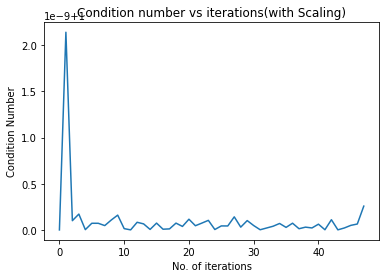

<Figure size 1440x1440 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
plt.plot(Iterations,Condition_Numbers)
plt.xlabel('No. of iterations')
plt.ylabel('Condition Number')
plt.title("Condition number vs iterations(with Scaling)")
plt.figure(figsize=(20,20))
plt.show()

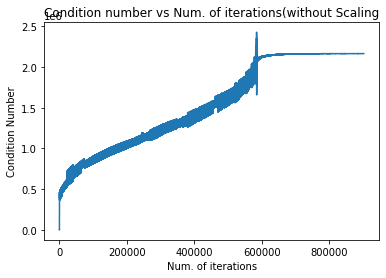

<Figure size 1440x1440 with 0 Axes>

In [78]:
plt.plot(Iterations_NoScale,Condition_Numbers_NoScale)
plt.xlabel('Num. of iterations')
plt.ylabel('Condition Number')
plt.title("Condition number vs Num. of iterations(without Scaling")
plt.figure(figsize=(20,20))
plt.show()

It can be seen from the above plots that the condition number goes near to 1 in case of scaling,which is very much lesser than this condition number when taken in case of non scaling. Which decreases the efficiency of the algorithm.